In [1]:
import numpy as np
import pandas as pd
from pandas import json_normalize
import requests

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Data Kumulatif

Digunakan untuk ringkasan data yang ditampilkan pada dashboard nanti. data yang digunakan: `tanggal terakhir update`, `total kasus terkonfirmasi`, `kasus dalam karantina`, `kasus sembuh`, `kasus meninggal`.

In [2]:
url = 'https://covid19-public.digitalservice.id/api/v1/rekapitulasi_v2/jabar/kumulatif?level=prov'
response = requests.get(url).json()
response.keys()

dict_keys(['status_code', 'data'])

In [3]:
response['data'].keys()

dict_keys(['metadata', 'content'])

In [4]:
response['data']['metadata']

{'last_update': '2021-09-28 09:42:15.643801'}

In [5]:
df_kum = json_normalize(response['data']['content'])

In [6]:
df_kum

,tanggal,kode_prov,nama_prov,SUSPECT,suspect_diisolasi,suspect_discarded,CLOSECONTACT,closecontact_dikarantina,closecontact_discarded,probable_discarded,probable_diisolasi,probable_meninggal,CONFIRMATION,confirmation_diisolasi,confirmation_selesai,confirmation_meninggal
0,2020-03-01,32,Jawa Barat,0,0,0,0,0,0,0,0,0,2,2,0,0
1,2020-03-02,32,Jawa Barat,0,0,0,0,0,0,0,0,0,2,2,0,0
2,2020-03-03,32,Jawa Barat,0,0,0,0,0,0,0,0,0,2,2,0,0
3,2020-03-04,32,Jawa Barat,0,0,0,0,0,0,0,0,0,3,3,0,0
4,2020-03-05,32,Jawa Barat,0,0,0,0,0,0,0,0,0,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2021-09-23,32,Jawa Barat,216886,8568,208318,572979,25744,547235,3999,276,2135,701506,3843,683088,14575
572,2021-09-24,32,Jawa Barat,216886,8568,208318,572979,25744,547235,3999,276,2135,701723,3719,683416,14588
573,2021-09-25,32,Jawa Barat,216886,8568,208318,572979,25744,547235,3999,276,2135,701911,3691,683630,14590
574,2021-09-26,32,Jawa Barat,216886,8568,208318,572979,25744,547235,3999,276,2135,702068,3546,683926,14596


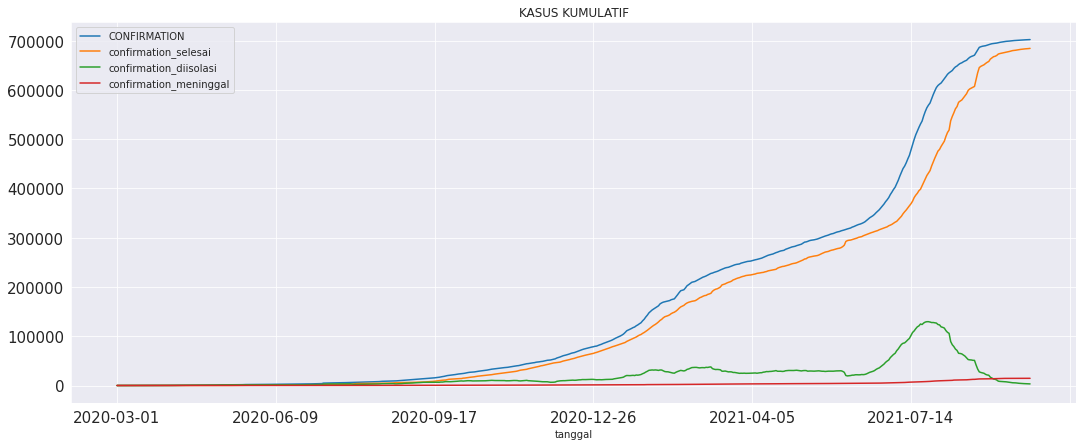

In [7]:
df_kum[['tanggal','CONFIRMATION','confirmation_selesai',
        'confirmation_diisolasi','confirmation_meninggal']].set_index('tanggal').plot(figsize=(18,7), 
                                                                                                             title='KASUS KUMULATIF',
                                                                                                             fontsize=15); 

In [8]:
# Ambil data pada dua baris terakhir
df_keterangan = pd.DataFrame(df_kum.iloc[-2:,:]).reset_index(drop=True)
df_keterangan

,tanggal,kode_prov,nama_prov,SUSPECT,suspect_diisolasi,suspect_discarded,CLOSECONTACT,closecontact_dikarantina,closecontact_discarded,probable_discarded,probable_diisolasi,probable_meninggal,CONFIRMATION,confirmation_diisolasi,confirmation_selesai,confirmation_meninggal
0,2021-09-26,32,Jawa Barat,216886,8568,208318,572979,25744,547235,3999,276,2135,702068,3546,683926,14596
1,2021-09-27,32,Jawa Barat,216886,8568,208318,572979,25744,547235,3999,276,2135,702217,3260,684355,14602


In [9]:
df_keterangan['PROBABLE'] = df_keterangan['probable_discarded']+df_keterangan['probable_diisolasi']+df_keterangan['probable_meninggal']
df_keterangan['PROBABLE']

0    6410
1    6410
Name: PROBABLE, dtype: int64

In [10]:
# Penambahan atau Pengurangan kasus
df_keterangan['CONFIRMATION_diff'] = df_keterangan['CONFIRMATION'].diff()
df_keterangan['confirmation_diisolasi_diff'] = df_keterangan['confirmation_diisolasi'].diff()
df_keterangan['confirmation_selesai_diff'] = df_keterangan['confirmation_selesai'].diff()
df_keterangan['confirmation_meninggal_diff'] = df_keterangan['confirmation_meninggal'].diff()

In [11]:
# Get final data

df_keterangan = pd.DataFrame(df_keterangan.iloc[-1,:]).T.reset_index(drop=True)
df_keterangan

,tanggal,kode_prov,nama_prov,SUSPECT,suspect_diisolasi,suspect_discarded,CLOSECONTACT,closecontact_dikarantina,closecontact_discarded,probable_discarded,probable_diisolasi,probable_meninggal,CONFIRMATION,confirmation_diisolasi,confirmation_selesai,confirmation_meninggal,PROBABLE,CONFIRMATION_diff,confirmation_diisolasi_diff,confirmation_selesai_diff,confirmation_meninggal_diff
0,2021-09-27,32,Jawa Barat,216886,8568,208318,572979,25744,547235,3999,276,2135,702217,3260,684355,14602,6410,149,-286,429,6


In [12]:
# df_keterangan.to_csv('drive/My Drive/Data Science Project/COVID-Jabar/covid_jabar_keterangan.csv',index=False)

# Data Kasus 

Digunakan untuk visualisasi grafik perkembangan kasus harian

In [13]:
url2 = 'https://covid19-public.digitalservice.id/api/v1/rekapitulasi_v2/jabar/harian?level=prov'
response2 = requests.get(url2).json()

In [14]:
df_harian = json_normalize(response2['data']['content'])
df_harian

,tanggal,kode_prov,nama_prov,SUSPECT,suspect_diisolasi,suspect_discarded,CLOSECONTACT,closecontact_dikarantina,closecontact_discarded,probable_discarded,probable_diisolasi,probable_meninggal,CONFIRMATION,confirmation_diisolasi,confirmation_selesai,confirmation_meninggal,suspect_meninggal_harian,closecontact_meninggal_harian
0,2020-03-01,32,Jawa Barat,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0
1,2020-03-02,32,Jawa Barat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-03-03,32,Jawa Barat,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2020-03-04,32,Jawa Barat,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0
4,2020-03-05,32,Jawa Barat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2021-09-23,32,Jawa Barat,0,0,0,0,0,0,0,0,0,243,0,373,13,0,0
572,2021-09-24,32,Jawa Barat,0,0,0,0,0,0,0,0,0,217,0,328,13,0,0
573,2021-09-25,32,Jawa Barat,0,0,0,0,0,0,0,0,0,188,0,214,2,0,0
574,2021-09-26,32,Jawa Barat,0,0,0,0,0,0,0,0,0,157,0,296,6,0,0


In [15]:
# Pilih data kasus yang terkonfirmasi
# Final data

df_cfm_harian = df_harian[['tanggal','CONFIRMATION',
       'confirmation_selesai', 'confirmation_meninggal']]

df_cfm_harian

,tanggal,CONFIRMATION,confirmation_selesai,confirmation_meninggal
0,2020-03-01,2,0,0
1,2020-03-02,0,0,0
2,2020-03-03,0,0,1
3,2020-03-04,2,0,0
4,2020-03-05,0,0,0
...,...,...,...,...
571,2021-09-23,243,373,13
572,2021-09-24,217,328,13
573,2021-09-25,188,214,2
574,2021-09-26,157,296,6


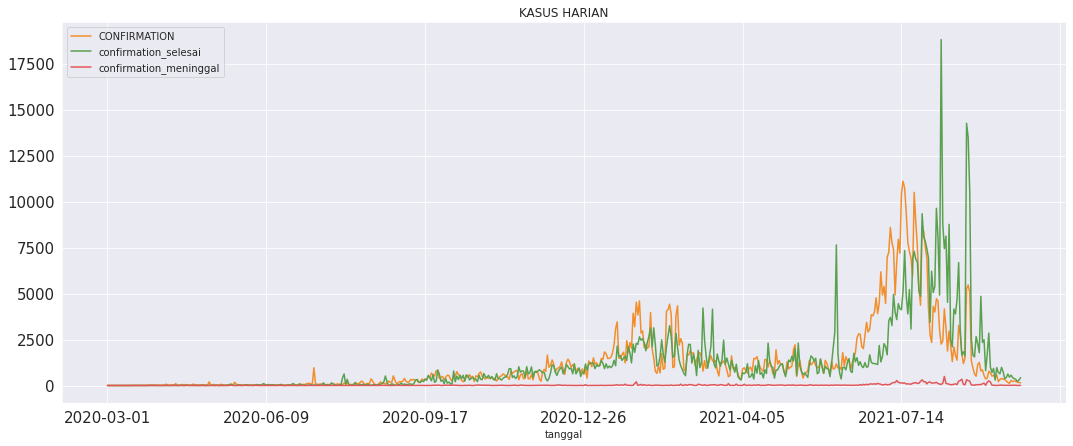

In [16]:
df_cfm_harian.set_index('tanggal').plot(figsize=(18,7), title='KASUS HARIAN', 
                                        fontsize=15, color=['#f28e2b','#59a14f','#e15759']);

In [17]:
# df_cfm_harian.to_csv('drive/My Drive/Data Science Project/COVID-Jabar/covid_jabar_harian.csv',index=False)

# Data Kasus per Gender

In [18]:
url3 = 'https://covid19-public.digitalservice.id/api/v1/rekapitulasi_v2/jabar?level=prov'
response3 = requests.get(url3).json()

In [19]:
df_kasus_info = json_normalize(response3['data']['content'])
df_kasus_info

,kode_prov,nama_prov,suspect_diisolasi,suspect_discarded,SUSPECT,closecontact_dikarantina,closecontact_discarded,CLOSECONTACT,probable_diisolasi,probable_discarded,PROBABLE,CONFIRMATION,confirmation_selesai,confirmation_meninggal,suspect_per_gender.laki_laki,suspect_per_gender.perempuan,suspect_per_usia.anak.laki_laki.bawah_1,suspect_per_usia.anak.laki_laki.1_5,suspect_per_usia.anak.laki_laki.5_6,suspect_per_usia.anak.laki_laki.6_18,suspect_per_usia.anak.perempuan.bawah_1,suspect_per_usia.anak.perempuan.1_5,suspect_per_usia.anak.perempuan.5_6,suspect_per_usia.anak.perempuan.6_18,suspect_per_usia.semua.laki_laki.bawah_5,suspect_per_usia.semua.laki_laki.6_19,suspect_per_usia.semua.laki_laki.20_29,suspect_per_usia.semua.laki_laki.30_39,suspect_per_usia.semua.laki_laki.40_49,suspect_per_usia.semua.laki_laki.50_59,suspect_per_usia.semua.laki_laki.60_69,suspect_per_usia.semua.laki_laki.70_79,suspect_per_usia.semua.laki_laki.atas_80,suspect_per_usia.semua.perempuan.bawah_5,suspect_per_usia.semua.perempuan.6_19,suspect_per_usia.semua.perempuan.20_29,suspect_per_usia.semua.perempuan.30_39,suspect_per_usia.semua.perempuan.40_49,suspect_per_usia.semua.perempuan.50_59,suspect_per_usia.semua.perempuan.60_69,...,confirmation_selesai_per_usia.semua.perempuan.atas_80,confirmation_meninggal_per_gender.laki_laki,confirmation_meninggal_per_gender.perempuan,confirmation_meninggal_per_usia.anak.laki_laki.bawah_1,confirmation_meninggal_per_usia.anak.laki_laki.1_5,confirmation_meninggal_per_usia.anak.laki_laki.5_6,confirmation_meninggal_per_usia.anak.laki_laki.6_18,confirmation_meninggal_per_usia.anak.perempuan.bawah_1,confirmation_meninggal_per_usia.anak.perempuan.1_5,confirmation_meninggal_per_usia.anak.perempuan.5_6,confirmation_meninggal_per_usia.anak.perempuan.6_18,confirmation_meninggal_per_usia.semua.laki_laki.bawah_5,confirmation_meninggal_per_usia.semua.laki_laki.6_19,confirmation_meninggal_per_usia.semua.laki_laki.20_29,confirmation_meninggal_per_usia.semua.laki_laki.30_39,confirmation_meninggal_per_usia.semua.laki_laki.40_49,confirmation_meninggal_per_usia.semua.laki_laki.50_59,confirmation_meninggal_per_usia.semua.laki_laki.60_69,confirmation_meninggal_per_usia.semua.laki_laki.70_79,confirmation_meninggal_per_usia.semua.laki_laki.atas_80,confirmation_meninggal_per_usia.semua.perempuan.bawah_5,confirmation_meninggal_per_usia.semua.perempuan.6_19,confirmation_meninggal_per_usia.semua.perempuan.20_29,confirmation_meninggal_per_usia.semua.perempuan.30_39,confirmation_meninggal_per_usia.semua.perempuan.40_49,confirmation_meninggal_per_usia.semua.perempuan.50_59,confirmation_meninggal_per_usia.semua.perempuan.60_69,confirmation_meninggal_per_usia.semua.perempuan.70_79,confirmation_meninggal_per_usia.semua.perempuan.atas_80,rdt.total,rdt.positif,rdt.negatif,rdt.invalid,rdt.belum_diketahui,rdt.tanggal,pcr.tanggal,pcr.jumlah_sampling,pcr.positif,pcr.negatif,pcr.invalid
0,32,Jawa Barat,8568,208318,216886,25744,547235,572979,2135,3999,6410,702217,684355,14602,43015,43037,1171,1219,272,4115,1131,1031,239,4307,2390,5012,8097,7654,7051,6733,4153,1746,32,2162,5236,9631,7773,6973,6380,3352,...,150,7206,7256,202,91,19,478,138,92,23,518,293,562,957,1075,1176,1492,1092,549,10,230,629,1216,1105,1191,1471,982,427,5,455175,8856,446319,0,0,28/12/2020,27/09/2021,1518290,404301,1104451,9538


In [20]:
df_kasus_info_T = df_kasus_info.T.reset_index()
df_kasus_info_T.rename(columns={'index':'Keterangan',0:'Jumlah'}, inplace=True)

In [21]:
df_kasus_info_T

,Keterangan,Jumlah
0,kode_prov,32
1,nama_prov,Jawa Barat
2,suspect_diisolasi,8568
3,suspect_discarded,208318
4,SUSPECT,216886
...,...,...
188,pcr.tanggal,27/09/2021
189,pcr.jumlah_sampling,1518290
190,pcr.positif,404301
191,pcr.negatif,1104451


In [22]:
# ambil data kasus terkonfirmasi saja
confirm = []
suspect = []
closecontact = []
another = []
for i in df_kasus_info_T['Keterangan']:
  if i.lower().startswith('confirmation'):
    confirm.append(i) 
  elif i.lower().startswith('suspect'):
    suspect.append(i)
  elif i.lower().startswith('closecontact'):
    closecontact.append(i)
  else:
    another.append(i)

In [23]:
print(len(confirm))
print(len(suspect))
print(len(closecontact))
print(len(another))

87
31
31
44


In [24]:
print(confirm)

['CONFIRMATION', 'confirmation_selesai', 'confirmation_meninggal', 'confirmation_per_gender.laki_laki', 'confirmation_per_gender.perempuan', 'confirmation_per_usia.anak.laki_laki.bawah_1', 'confirmation_per_usia.anak.laki_laki.1_5', 'confirmation_per_usia.anak.laki_laki.5_6', 'confirmation_per_usia.anak.laki_laki.6_18', 'confirmation_per_usia.anak.perempuan.bawah_1', 'confirmation_per_usia.anak.perempuan.1_5', 'confirmation_per_usia.anak.perempuan.5_6', 'confirmation_per_usia.anak.perempuan.6_18', 'confirmation_per_usia.semua.laki_laki.bawah_5', 'confirmation_per_usia.semua.laki_laki.6_19', 'confirmation_per_usia.semua.laki_laki.20_29', 'confirmation_per_usia.semua.laki_laki.30_39', 'confirmation_per_usia.semua.laki_laki.40_49', 'confirmation_per_usia.semua.laki_laki.50_59', 'confirmation_per_usia.semua.laki_laki.60_69', 'confirmation_per_usia.semua.laki_laki.70_79', 'confirmation_per_usia.semua.laki_laki.atas_80', 'confirmation_per_usia.semua.perempuan.bawah_5', 'confirmation_per_usia

In [25]:
df_kasus_info_cfm = df_kasus_info[confirm]
df_kasus_info_cfm

,CONFIRMATION,confirmation_selesai,confirmation_meninggal,confirmation_per_gender.laki_laki,confirmation_per_gender.perempuan,confirmation_per_usia.anak.laki_laki.bawah_1,confirmation_per_usia.anak.laki_laki.1_5,confirmation_per_usia.anak.laki_laki.5_6,confirmation_per_usia.anak.laki_laki.6_18,confirmation_per_usia.anak.perempuan.bawah_1,confirmation_per_usia.anak.perempuan.1_5,confirmation_per_usia.anak.perempuan.5_6,confirmation_per_usia.anak.perempuan.6_18,confirmation_per_usia.semua.laki_laki.bawah_5,confirmation_per_usia.semua.laki_laki.6_19,confirmation_per_usia.semua.laki_laki.20_29,confirmation_per_usia.semua.laki_laki.30_39,confirmation_per_usia.semua.laki_laki.40_49,confirmation_per_usia.semua.laki_laki.50_59,confirmation_per_usia.semua.laki_laki.60_69,confirmation_per_usia.semua.laki_laki.70_79,confirmation_per_usia.semua.laki_laki.atas_80,confirmation_per_usia.semua.perempuan.bawah_5,confirmation_per_usia.semua.perempuan.6_19,confirmation_per_usia.semua.perempuan.20_29,confirmation_per_usia.semua.perempuan.30_39,confirmation_per_usia.semua.perempuan.40_49,confirmation_per_usia.semua.perempuan.50_59,confirmation_per_usia.semua.perempuan.60_69,confirmation_per_usia.semua.perempuan.70_79,confirmation_per_usia.semua.perempuan.atas_80,confirmation_selesai_per_gender.laki_laki,confirmation_selesai_per_gender.perempuan,confirmation_selesai_per_usia.anak.laki_laki.bawah_1,confirmation_selesai_per_usia.anak.laki_laki.1_5,confirmation_selesai_per_usia.anak.laki_laki.5_6,confirmation_selesai_per_usia.anak.laki_laki.6_18,confirmation_selesai_per_usia.anak.perempuan.bawah_1,confirmation_selesai_per_usia.anak.perempuan.1_5,confirmation_selesai_per_usia.anak.perempuan.5_6,...,confirmation_selesai_per_usia.semua.laki_laki.60_69,confirmation_selesai_per_usia.semua.laki_laki.70_79,confirmation_selesai_per_usia.semua.laki_laki.atas_80,confirmation_selesai_per_usia.semua.perempuan.bawah_5,confirmation_selesai_per_usia.semua.perempuan.6_19,confirmation_selesai_per_usia.semua.perempuan.20_29,confirmation_selesai_per_usia.semua.perempuan.30_39,confirmation_selesai_per_usia.semua.perempuan.40_49,confirmation_selesai_per_usia.semua.perempuan.50_59,confirmation_selesai_per_usia.semua.perempuan.60_69,confirmation_selesai_per_usia.semua.perempuan.70_79,confirmation_selesai_per_usia.semua.perempuan.atas_80,confirmation_meninggal_per_gender.laki_laki,confirmation_meninggal_per_gender.perempuan,confirmation_meninggal_per_usia.anak.laki_laki.bawah_1,confirmation_meninggal_per_usia.anak.laki_laki.1_5,confirmation_meninggal_per_usia.anak.laki_laki.5_6,confirmation_meninggal_per_usia.anak.laki_laki.6_18,confirmation_meninggal_per_usia.anak.perempuan.bawah_1,confirmation_meninggal_per_usia.anak.perempuan.1_5,confirmation_meninggal_per_usia.anak.perempuan.5_6,confirmation_meninggal_per_usia.anak.perempuan.6_18,confirmation_meninggal_per_usia.semua.laki_laki.bawah_5,confirmation_meninggal_per_usia.semua.laki_laki.6_19,confirmation_meninggal_per_usia.semua.laki_laki.20_29,confirmation_meninggal_per_usia.semua.laki_laki.30_39,confirmation_meninggal_per_usia.semua.laki_laki.40_49,confirmation_meninggal_per_usia.semua.laki_laki.50_59,confirmation_meninggal_per_usia.semua.laki_laki.60_69,confirmation_meninggal_per_usia.semua.laki_laki.70_79,confirmation_meninggal_per_usia.semua.laki_laki.atas_80,confirmation_meninggal_per_usia.semua.perempuan.bawah_5,confirmation_meninggal_per_usia.semua.perempuan.6_19,confirmation_meninggal_per_usia.semua.perempuan.20_29,confirmation_meninggal_per_usia.semua.perempuan.30_39,confirmation_meninggal_per_usia.semua.perempuan.40_49,confirmation_meninggal_per_usia.semua.perempuan.50_59,confirmation_meninggal_per_usia.semua.perempuan.60_69,confirmation_meninggal_per_usia.semua.perempuan.70_79,confirmation_meninggal_per_usia.semua.perempuan.atas_80
0,702217,684355,14602,337652,354293,6219,7752,1900,35742,6298,7081,1889,38546,51,205,357,383,326,244,157,67,0,50,253,356,302,285,263,170,66,0,328656,345292,5999,7628,1868,35101,6144,695

In [26]:
#Ambil gender
gender = []
for c in df_kasus_info_cfm.columns:
  if c.find('gender') != -1:
    gender.append(c)

In [27]:
gender

['confirmation_per_gender.laki_laki',
 'confirmation_per_gender.perempuan',
 'confirmation_selesai_per_gender.laki_laki',
 'confirmation_selesai_per_gender.perempuan',
 'confirmation_meninggal_per_gender.laki_laki',
 'confirmation_meninggal_per_gender.perempuan']

In [28]:
df_kasus_gender = df_kasus_info_cfm[gender].T.reset_index()
df_kasus_gender

,index,0
0,confirmation_per_gender.laki_laki,337652
1,confirmation_per_gender.perempuan,354293
2,confirmation_selesai_per_gender.laki_laki,328656
3,confirmation_selesai_per_gender.perempuan,345292
4,confirmation_meninggal_per_gender.laki_laki,7206
5,confirmation_meninggal_per_gender.perempuan,7256


In [29]:
#get gender
df_kasus_gender['gender'] = df_kasus_gender['index'].apply(lambda x:x.split('.')[-1])

In [30]:
df_kasus_gender

,index,0,gender
0,confirmation_per_gender.laki_laki,337652,laki_laki
1,confirmation_per_gender.perempuan,354293,perempuan
2,confirmation_selesai_per_gender.laki_laki,328656,laki_laki
3,confirmation_selesai_per_gender.perempuan,345292,perempuan
4,confirmation_meninggal_per_gender.laki_laki,7206,laki_laki
5,confirmation_meninggal_per_gender.perempuan,7256,perempuan


In [31]:
#get status konfirmasi
values = []
for r in df_kasus_gender['index']:
  if 'selesai' in r:
    values.append('selesai')
  elif 'meninggal' in r:
    values.append('meninggal')
  else:
    values.append('konfirmasi')

In [32]:
df_kasus_gender['status'] = values

In [33]:
df_kasus_gender

,index,0,gender,status
0,confirmation_per_gender.laki_laki,337652,laki_laki,konfirmasi
1,confirmation_per_gender.perempuan,354293,perempuan,konfirmasi
2,confirmation_selesai_per_gender.laki_laki,328656,laki_laki,selesai
3,confirmation_selesai_per_gender.perempuan,345292,perempuan,selesai
4,confirmation_meninggal_per_gender.laki_laki,7206,laki_laki,meninggal
5,confirmation_meninggal_per_gender.perempuan,7256,perempuan,meninggal


In [34]:
df_kasus_gender.rename(columns={0:'jumlah_kasus'},inplace=True)
df_kasus_gender = df_kasus_gender[['status','gender','jumlah_kasus']]
df_kasus_gender 

,status,gender,jumlah_kasus
0,konfirmasi,laki_laki,337652
1,konfirmasi,perempuan,354293
2,selesai,laki_laki,328656
3,selesai,perempuan,345292
4,meninggal,laki_laki,7206
5,meninggal,perempuan,7256


Tidak semua data kasus memiliki keterangan gender. kita akan mencari tahu berapa banyak data yang tidak memiliki keterangan gender

In [35]:
df_kasus_info_cfm['CONFIRMATION']

0    702217
Name: CONFIRMATION, dtype: int64

In [36]:
df_kasus_info_cfm['confirmation_selesai']

0    684355
Name: confirmation_selesai, dtype: int64

In [37]:
df_kasus_info_cfm['confirmation_meninggal']

0    14602
Name: confirmation_meninggal, dtype: int64

In [38]:
# Total data kasus terkonfirmasi
df_kasus_total = df_kasus_info_cfm.iloc[:,:3].T.reset_index()
df_kasus_total.rename(columns={'index':'status',0:'jumlah_kasus'},inplace=True)

In [39]:
df_kasus_total

,status,jumlah_kasus
0,CONFIRMATION,702217
1,confirmation_selesai,684355
2,confirmation_meninggal,14602


In [40]:
df_kasus_gender_status = df_kasus_gender.groupby('status').sum().reset_index()
df_kasus_gender_status

,status,jumlah_kasus
0,konfirmasi,691945
1,meninggal,14462
2,selesai,673948


In [41]:
null_confirm = df_kasus_info_cfm['CONFIRMATION'].values-df_kasus_gender_status[df_kasus_gender_status['status']=='konfirmasi']['jumlah_kasus'].values
null_selesai = df_kasus_info_cfm['confirmation_selesai'].values-df_kasus_gender_status[df_kasus_gender_status['status']=='selesai']['jumlah_kasus'].values
null_meninggal = df_kasus_info_cfm['confirmation_meninggal'].values-df_kasus_gender_status[df_kasus_gender_status['status']=='meninggal']['jumlah_kasus'].values

In [42]:
df_null_gender = pd.DataFrame({'status':['konfirmasi','selesai','meninggal'],
                               'gender':['N/A','N/A','N/A'],
                               'jumlah_kasus':[null_confirm[0], null_selesai[0], null_meninggal[0]]})
df_null_gender

,status,gender,jumlah_kasus
0,konfirmasi,N/A,10272
1,selesai,N/A,10407
2,meninggal,N/A,140


In [43]:
df_gender_final = pd.concat([df_null_gender,df_kasus_gender])
df_gender_final

,status,gender,jumlah_kasus
0,konfirmasi,N/A,10272
1,selesai,N/A,10407
2,meninggal,N/A,140
0,konfirmasi,laki_laki,337652
1,konfirmasi,perempuan,354293
2,selesai,laki_laki,328656
3,selesai,perempuan,345292
4,meninggal,laki_laki,7206
5,meninggal,perempuan,7256


In [44]:
# df_gender_final.to_csv('drive/My Drive/Data Science Project/COVID-Jabar/covid_jabar_gender_kumulatif.csv',index=False)

# Data kasus per rentang usia

In [45]:
usia = []
for c in df_kasus_info_cfm.columns:
  if 'usia' in c:
    usia.append(c)

In [46]:
len(usia)

78

In [47]:
usia

['confirmation_per_usia.anak.laki_laki.bawah_1',
 'confirmation_per_usia.anak.laki_laki.1_5',
 'confirmation_per_usia.anak.laki_laki.5_6',
 'confirmation_per_usia.anak.laki_laki.6_18',
 'confirmation_per_usia.anak.perempuan.bawah_1',
 'confirmation_per_usia.anak.perempuan.1_5',
 'confirmation_per_usia.anak.perempuan.5_6',
 'confirmation_per_usia.anak.perempuan.6_18',
 'confirmation_per_usia.semua.laki_laki.bawah_5',
 'confirmation_per_usia.semua.laki_laki.6_19',
 'confirmation_per_usia.semua.laki_laki.20_29',
 'confirmation_per_usia.semua.laki_laki.30_39',
 'confirmation_per_usia.semua.laki_laki.40_49',
 'confirmation_per_usia.semua.laki_laki.50_59',
 'confirmation_per_usia.semua.laki_laki.60_69',
 'confirmation_per_usia.semua.laki_laki.70_79',
 'confirmation_per_usia.semua.laki_laki.atas_80',
 'confirmation_per_usia.semua.perempuan.bawah_5',
 'confirmation_per_usia.semua.perempuan.6_19',
 'confirmation_per_usia.semua.perempuan.20_29',
 'confirmation_per_usia.semua.perempuan.30_39',
 '

In [48]:
df_kasus_usia = df_kasus_info_cfm[usia].T.reset_index()
df_kasus_usia

,index,0
0,confirmation_per_usia.anak.laki_laki.bawah_1,6219
1,confirmation_per_usia.anak.laki_laki.1_5,7752
2,confirmation_per_usia.anak.laki_laki.5_6,1900
3,confirmation_per_usia.anak.laki_laki.6_18,35742
4,confirmation_per_usia.anak.perempuan.bawah_1,6298
...,...,...
73,confirmation_meninggal_per_usia.semua.perempua...,1191
74,confirmation_meninggal_per_usia.semua.perempua...,1471
75,confirmation_meninggal_per_usia.semua.perempua...,982
76,confirmation_meninggal_per_usia.semua.perempua...,427


In [49]:
df_kasus_usia['golongan'] = df_kasus_usia['index'].apply(lambda x : 'Semua Umur' if 'semua' in x else 'Anak')

In [50]:
#Get status terkonfirmasi
values = []
for r in df_kasus_usia['index']:
  if 'selesai' in r:
    values.append('selesai')
  elif 'meninggal' in r:
    values.append('meninggal')
  else:
    values.append('konfirmasi')


df_kasus_usia['status'] = values

In [51]:
#get gender
df_kasus_usia['gender']=df_kasus_usia['index'].apply(lambda x : 'Pria' if 'laki_laki' in x else 'Wanita')
#get usia
df_kasus_usia['usia'] = df_kasus_usia['index'].apply(lambda x : x.split('.')[-1])

In [52]:
df_kasus_usia['usia'].unique()

array(['bawah_1', '1_5', '5_6', '6_18', 'bawah_5', '6_19', '20_29',
       '30_39', '40_49', '50_59', '60_69', '70_79', 'atas_80'],
      dtype=object)

In [53]:
#fix usia
def fix_usia(x):
  if x == 'bawah_1':
    return '< 1'
  elif x =='bawah_5':
    return '< 5'
  elif x == 'atas_80':
    return '> 80'
  else:
    return x.replace('_','-')

In [54]:
df_kasus_usia['rentang_usia'] = df_kasus_usia['usia'].apply(fix_usia)

In [55]:
df_kasus_usia['rentang_usia'].unique()

array(['< 1', '1-5', '5-6', '6-18', '< 5', '6-19', '20-29', '30-39',
       '40-49', '50-59', '60-69', '70-79', '> 80'], dtype=object)

In [56]:
df_kasus_usia.rename(columns={0:'jumlah_kasus'}, inplace=True)
df_kasus_usia.drop(['index','usia'],axis=1, inplace=True)

In [57]:
df_kasus_usia

,jumlah_kasus,golongan,status,gender,rentang_usia
0,6219,Anak,konfirmasi,Pria,< 1
1,7752,Anak,konfirmasi,Pria,1-5
2,1900,Anak,konfirmasi,Pria,5-6
3,35742,Anak,konfirmasi,Pria,6-18
4,6298,Anak,konfirmasi,Wanita,< 1
...,...,...,...,...,...
73,1191,Semua Umur,meninggal,Wanita,40-49
74,1471,Semua Umur,meninggal,Wanita,50-59
75,982,Semua Umur,meninggal,Wanita,60-69
76,427,Semua Umur,meninggal,Wanita,70-79


In [58]:
cols =['status', 'gender', 'golongan', 'rentang_usia', 'jumlah_kasus']
df_kasus_usia = df_kasus_usia[cols]
df_kasus_usia

,status,gender,golongan,rentang_usia,jumlah_kasus
0,konfirmasi,Pria,Anak,< 1,6219
1,konfirmasi,Pria,Anak,1-5,7752
2,konfirmasi,Pria,Anak,5-6,1900
3,konfirmasi,Pria,Anak,6-18,35742
4,konfirmasi,Wanita,Anak,< 1,6298
...,...,...,...,...,...
73,meninggal,Wanita,Semua Umur,40-49,1191
74,meninggal,Wanita,Semua Umur,50-59,1471
75,meninggal,Wanita,Semua Umur,60-69,982
76,meninggal,Wanita,Semua Umur,70-79,427


In [59]:
# df_kasus_usia.to_csv('drive/My Drive/Data Science Project/COVID-Jabar/covid_jabar_usia_kumulatif.csv',index=False)

# Data Kasus Per Kabupaten/Kota

In [60]:
# Data Kasus per Kabupaten/Kota
url_kab = 'https://covid19-public.digitalservice.id/api/v1/rekapitulasi_v2/jabar/harian?level=kab'
result_kab = requests.get(url_kab).json()
result_kab.keys()

dict_keys(['status_code', 'data'])

In [61]:
df_kab = json_normalize(result_kab['data']['content'])
df_kab

,tanggal,kode_prov,nama_prov,kode_kab,nama_kab,SUSPECT,CLOSECONTACT,PROBABLE,suspect_diisolasi,suspect_discarded,closecontact_dikarantina,closecontact_discarded,probable_diisolasi,probable_discarded,CONFIRMATION,confirmation_sembuh,confirmation_meninggal,suspect_meninggal,closecontact_meninggal,probable_meninggal
0,2020-08-05,32,Jawa Barat,3204,Kabupaten Bandung,2210,274,26,31,2179,0,274,0,0,0,0,0,0,0,26
1,2020-08-05,32,Jawa Barat,3217,Kabupaten Bandung Barat,776,534,7,3,773,72,462,0,0,0,0,0,0,0,7
2,2020-08-05,32,Jawa Barat,3216,Kabupaten Bekasi,5536,2127,33,4001,1535,135,1992,1,0,0,0,0,0,0,32
3,2020-08-05,32,Jawa Barat,3201,Kabupaten Bogor,0,0,163,0,0,0,0,0,0,0,0,0,0,0,163
4,2020-08-05,32,Jawa Barat,3207,Kabupaten Ciamis,2075,1295,3,2075,0,3,1292,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11308,2021-09-27,32,Jawa Barat,3277,Kota Cimahi,0,0,35,0,0,0,0,0,0,0,0,0,0,0,35
11309,2021-09-27,32,Jawa Barat,3274,Kota Cirebon,0,0,2,0,0,0,0,0,1,0,1,0,0,0,1
11310,2021-09-27,32,Jawa Barat,3276,Kota Depok,0,0,32,0,0,0,0,25,0,58,101,2,0,0,7
11311,2021-09-27,32,Jawa Barat,3272,Kota Sukabumi,0,0,32,0,0,0,0,0,3,7,3,0,0,0,29


In [62]:
# Hanya data kasus terkonfirmasi
df_kab_cfm = df_kab[['tanggal','kode_kab','nama_kab','CONFIRMATION','confirmation_sembuh', 'confirmation_meninggal']]

In [63]:
df_kab_cfm

,tanggal,kode_kab,nama_kab,CONFIRMATION,confirmation_sembuh,confirmation_meninggal
0,2020-08-05,3204,Kabupaten Bandung,0,0,0
1,2020-08-05,3217,Kabupaten Bandung Barat,0,0,0
2,2020-08-05,3216,Kabupaten Bekasi,0,0,0
3,2020-08-05,3201,Kabupaten Bogor,0,0,0
4,2020-08-05,3207,Kabupaten Ciamis,0,0,0
...,...,...,...,...,...,...
11308,2021-09-27,3277,Kota Cimahi,0,0,0
11309,2021-09-27,3274,Kota Cirebon,0,1,0
11310,2021-09-27,3276,Kota Depok,58,101,2
11311,2021-09-27,3272,Kota Sukabumi,7,3,0


In [64]:
df_kab_cfm = df_kab_cfm.groupby('nama_kab').sum().reset_index()
df_kab_cfm['nama_kab'] = df_kab_cfm['nama_kab'].apply(lambda x : x.upper())

In [65]:
df_kab_cfm

,nama_kab,CONFIRMATION,confirmation_sembuh,confirmation_meninggal
0,KABUPATEN BANDUNG,33736,32806,608
1,KABUPATEN BANDUNG BARAT,19108,18765,265
2,KABUPATEN BEKASI,51083,50438,536
3,KABUPATEN BOGOR,47623,47279,206
4,KABUPATEN CIAMIS,15088,14575,310
5,KABUPATEN CIANJUR,10825,10565,200
6,KABUPATEN CIREBON,24904,23923,886
7,KABUPATEN GARUT,26687,25357,1160
8,KABUPATEN INDRAMAYU,15715,14942,696
9,KABUPATEN KARAWANG,43200,41312,1839


In [66]:
df_kab_cfm['wilayah'] = df_kab_cfm['nama_kab'].apply(lambda x : 'KAB.' if x.split(' ')[0] == 'KABUPATEN' else x.split(' ')[0])
df_kab_cfm['daerah'] = df_kab_cfm['nama_kab'].apply(lambda x : x.split(' ')[1] if len(x.split(' '))<2 else ' '.join(x.split(' ')[1:]))
df_kab_cfm['nama_daerah'] = df_kab_cfm['wilayah']+' '+df_kab_cfm['daerah']
df_kab_cfm.drop(['nama_kab','wilayah','daerah'],axis=1, inplace=True)

In [67]:
df_kab_cfm = df_kab_cfm[['nama_daerah', 'CONFIRMATION', 'confirmation_sembuh','confirmation_meninggal']]
df_kab_cfm

,nama_daerah,CONFIRMATION,confirmation_sembuh,confirmation_meninggal
0,KAB. BANDUNG,33736,32806,608
1,KAB. BANDUNG BARAT,19108,18765,265
2,KAB. BEKASI,51083,50438,536
3,KAB. BOGOR,47623,47279,206
4,KAB. CIAMIS,15088,14575,310
5,KAB. CIANJUR,10825,10565,200
6,KAB. CIREBON,24904,23923,886
7,KAB. GARUT,26687,25357,1160
8,KAB. INDRAMAYU,15715,14942,696
9,KAB. KARAWANG,43200,41312,1839


In [68]:
# Data Wilayah Kabupaten/Kota
url_wil = 'https://covid19-public.digitalservice.id/api/v1/wilayah/jabar?level=kabupaten'
response = requests.get(url_wil).json()

In [69]:
df_location = json_normalize(response['data'])
df_location

,kode_kemendagri,kode_bps,nama_wilayah,tingkat_wilayah,parent_kemendagri,parent_bps,latitude,longitude
0,32.04,3204,KAB. BANDUNG,2,null,0,-7.100,107.611
1,32.17,3217,KAB. BANDUNG BARAT,2,null,0,-6.897,107.415
2,32.16,3216,KAB. BEKASI,2,null,0,-6.215,107.121
3,32.01,3201,KAB. BOGOR,2,null,0,-6.560,106.768
4,32.07,3207,KAB. CIAMIS,2,null,0,-7.291,108.429
5,32.03,3203,KAB. CIANJUR,2,null,0,-7.134,107.158
6,32.09,3209,KAB. CIREBON,2,null,0,-6.746,108.551
7,32.05,3205,KAB. GARUT,2,null,0,-7.360,107.789
8,32.12,3212,KAB. INDRAMAYU,2,null,0,-6.449,108.169
9,32.15,3215,KAB. KARAWANG,2,null,0,-6.252,107.354


In [70]:
#Merge data kasus per kab/kota dengan data lokasi
df_kasus_map = pd.merge(df_kab_cfm, df_location[['nama_wilayah','latitude','longitude']], how='left', left_on='nama_daerah', right_on='nama_wilayah')

In [71]:
df_kasus_map['provinsi'] = 'JAWA BARAT'

In [72]:
df_kasus_map

,nama_daerah,CONFIRMATION,confirmation_sembuh,confirmation_meninggal,nama_wilayah,latitude,longitude,provinsi
0,KAB. BANDUNG,33736,32806,608,KAB. BANDUNG,-7.100,107.611,JAWA BARAT
1,KAB. BANDUNG BARAT,19108,18765,265,KAB. BANDUNG BARAT,-6.897,107.415,JAWA BARAT
2,KAB. BEKASI,51083,50438,536,KAB. BEKASI,-6.215,107.121,JAWA BARAT
3,KAB. BOGOR,47623,47279,206,KAB. BOGOR,-6.560,106.768,JAWA BARAT
4,KAB. CIAMIS,15088,14575,310,KAB. CIAMIS,-7.291,108.429,JAWA BARAT
5,KAB. CIANJUR,10825,10565,200,KAB. CIANJUR,-7.134,107.158,JAWA BARAT
6,KAB. CIREBON,24904,23923,886,KAB. CIREBON,-6.746,108.551,JAWA BARAT
7,KAB. GARUT,26687,25357,1160,KAB. GARUT,-7.360,107.789,JAWA BARAT
8,KAB. INDRAMAYU,15715,14942,696,KAB. INDRAMAYU,-6.449,108.169,JAWA BARAT
9,KAB. KARAWANG,43200,41312,1839,KAB. KARAWANG,-6.252,107.354,JAWA BARAT


In [73]:
# df_kasus_map.to_csv('drive/My Drive/Data Science Project/COVID-Jabar/data_kasus_map.csv')